In [1]:
from web_scraping import get_team_goals
from poisson import prob_dist, prob
from allocation import alloc

# Marseille - PSG
## 1. Get the data

In [2]:
from concurrent.futures import ThreadPoolExecutor

# Check "Flashscore.com" to get the exact names of the both teams, otherwise it won't be able to get their stats
name1='Marseille'
name2='PSG'

# This will open 2 browsers to get the data for each team
with ThreadPoolExecutor(max_workers=2) as executor:
    res1=executor.submit(get_team_goals, name1, name2, 2022)
    res2=executor.submit(get_team_goals, name2, name1, 2022)

    team1=res1.result()
    team2=res2.result()

## 2. Plot the Poisson distribution and add the results in a list

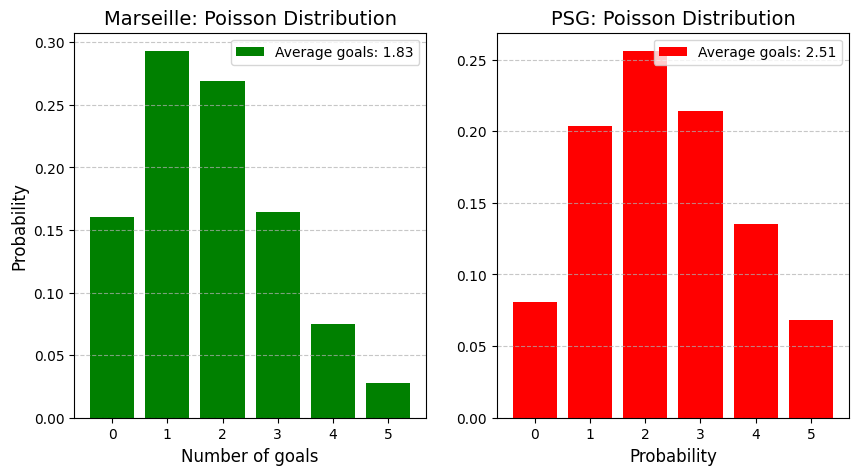

In [5]:
from statistics import mean
goals1=team1[0]['goals']
goals2=team2[0]['goals']
prob_dist(mean(goals1), mean(goals2), n=[name1, name2], goals=5)

In [8]:
# Append the results into a list
res=[]
res.append(prob(mean(goals1), mean(goals2), n=[name1, name2], goals=5))

In [9]:
res

[{'Marseille': {'goals': [0, 1, 2, 3, 4, 5],
   'p': [0.16, 0.293, 0.269, 0.164, 0.075, 0.028]},
  'PSG': {'goals': [0, 1, 2, 3, 4, 5],
   'p': [0.081, 0.204, 0.256, 0.214, 0.135, 0.068]}}]

## From the plots above, we can pick 4 events:
### 1. Marseille > 0.5
### 2. Marseille < 2.5
### 3. PSG > 0.5
### 4. PSG < 3.5
## Now manually check with a sports betting platform to see the odds of these events.

In [12]:
# Calculate the probabilities for each event
marseille_over_0_5=1-res[0][name1]['p'][0]
marseille_under_2_5=sum(res[0][name1]['p'][:3])
psg_over_0_5=1-res[0][name2]['p'][0]
psg_under_3_5=sum(res[0][name2]['p'][:4])

In [19]:
probabilities=[marseille_over_0_5, marseille_under_2_5, psg_over_0_5, psg_under_3_5]
probabilities

[0.84, 0.722, 0.919, 0.755]

In [20]:
# For me, these are the odds offered by the sports betting platform I chose to get the odds from
odds=[1.35, 1.08, 1.10, 1.06]
odds

[1.35, 1.08, 1.1, 1.06]

## 3. Allocate money amongst the bets

In [21]:
bets=alloc(odds, probabilities, 1000) # Suppose we have $1000 available balance
bets

[778.455, 0, 221.545, 0]

In [22]:
# Check the potential winnings
potential_wins=[bets[i]*odds[i] for i in range(len(bets))]

potential_wins, sum(potential_wins)

([1050.91425, 0.0, 243.6995, 0.0], 1294.61375)

## The allocation model indicates that out of 1000 dollars :
### 1. 778.455 should be used for the event "Marseille > 0.5 goals"
### 2. 221.545 should be used for the event "PSG > 0.5 goals"